                       Movie Recommendation System Project in R(Using IMDB Data sets)
                     
         

In [1]:
library(recommenderlab) 

Loading required package: Matrix

Loading required package: arules


Attaching package: 'arules'


The following objects are masked from 'package:base':

    abbreviate, write


Loading required package: proxy


Attaching package: 'proxy'


The following object is masked from 'package:Matrix':

    as.matrix


The following objects are masked from 'package:stats':

    as.dist, dist


The following object is masked from 'package:base':

    as.matrix


Loading required package: registry

Registered S3 methods overwritten by 'registry':
  method               from 
  print.registry_field proxy
  print.registry_entry proxy



In [2]:
install.packages("recommenderlab")

Warning message:
"package 'recommenderlab' is in use and will not be installed"


In [3]:
labrary(recommenderlab)

ERROR: Error in labrary(recommenderlab): could not find function "labrary"


In [3]:
library(recommenderlab)

In [4]:
library(ggplot2)

In [5]:
install.packages("data.table")

Installing package into 'C:/Users/ACER/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ACER\AppData\Local\Temp\RtmpSScmHm\downloaded_packages


In [6]:
library(data.table)

In [7]:
library(reshape2)


Attaching package: 'reshape2'


The following objects are masked from 'package:data.table':

    dcast, melt




In [14]:
setwd("C:/Users/ACER/Downloads/movie_data")
movie_data <-read.csv("movies.csv",stringsAsFactors=FALSE)
rating_data <-read.csv("ratings.csv")
str(movie_data)

'data.frame':	10329 obs. of  3 variables:
 $ movieId: int  1 2 3 4 5 6 7 8 9 10 ...
 $ title  : chr  "Toy Story (1995)" "Jumanji (1995)" "Grumpier Old Men (1995)" "Waiting to Exhale (1995)" ...
 $ genres : chr  "Adventure|Animation|Children|Comedy|Fantasy" "Adventure|Children|Fantasy" "Comedy|Romance" "Comedy|Drama|Romance" ...


In [15]:
summary(movie_data)

    movieId          title              genres         
 Min.   :     1   Length:10329       Length:10329      
 1st Qu.:  3240   Class :character   Class :character  
 Median :  7088   Mode  :character   Mode  :character  
 Mean   : 31924                                        
 3rd Qu.: 59900                                        
 Max.   :149532                                        

In [16]:
head(movie_data)

,movieId,title,genres
,<int>,<chr>,<chr>
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,2,Jumanji (1995),Adventure|Children|Fantasy
3,3,Grumpier Old Men (1995),Comedy|Romance
4,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,5,Father of the Bride Part II (1995),Comedy
6,6,Heat (1995),Action|Crime|Thriller


In [17]:
summary(rating_data)

     userId         movieId           rating        timestamp        
 Min.   :  1.0   Min.   :     1   Min.   :0.500   Min.   :8.286e+08  
 1st Qu.:192.0   1st Qu.:  1073   1st Qu.:3.000   1st Qu.:9.711e+08  
 Median :383.0   Median :  2497   Median :3.500   Median :1.115e+09  
 Mean   :364.9   Mean   : 13381   Mean   :3.517   Mean   :1.130e+09  
 3rd Qu.:557.0   3rd Qu.:  5991   3rd Qu.:4.000   3rd Qu.:1.275e+09  
 Max.   :668.0   Max.   :149532   Max.   :5.000   Max.   :1.452e+09  

In [18]:
head(rating_data)

,userId,movieId,rating,timestamp
,<int>,<int>,<dbl>,<int>
1,1,16,4.0,1217897793
2,1,24,1.5,1217895807
3,1,32,4.0,1217896246
4,1,47,4.0,1217896556
5,1,50,4.0,1217896523
6,1,110,4.0,1217896150


In [22]:
movie_genre <- as.data.frame(movie_data$genres,stringsAsFactors=FALSE)
library(data.table)
movie_genre2 <- as.data.frame(tstrsplit(movie_genre[,1],'[ | ]',type.convert=TRUE),stringAsFactors= FALSE)
colnames(movie_genre2) <-c(1:10)
list_genre <- c("Action","Adventure","Animation","Children","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western")
genre_mat1 <- matrix(0,10330,18)
genre_mat1[1,] <- list_genre

for(index in 1:nrow(movie_genre2))
    {
        for(col in 1:ncol(movie_genre2))
        {
            gen_col = which(genre_mat1[1,] == movie_genre2[index,col])
            genre_mat1[index+1,gen_col] <-1
         }
     }
     genre_mat2 <- as.data.frame(genre_mat1[-1,],stringsAsFactors=FALSE)
     for(col in 1:ncol(genre_mat2))
     {
         genre_mat2[,col]<-as.integer(genre_mat2[,col])
     }
     str(genre_mat2)
      

'data.frame':	10329 obs. of  18 variables:
 $ V1 : int  0 0 0 0 0 1 0 0 1 1 ...
 $ V2 : int  1 1 0 0 0 0 0 1 0 1 ...
 $ V3 : int  1 0 0 0 0 0 0 0 0 0 ...
 $ V4 : int  1 1 0 0 0 0 0 1 0 0 ...
 $ V5 : int  1 0 1 1 1 0 1 0 0 0 ...
 $ V6 : int  0 0 0 0 0 1 0 0 0 0 ...
 $ V7 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ V8 : int  0 0 0 1 0 0 0 0 0 0 ...
 $ V9 : int  1 1 0 0 0 0 0 0 0 0 ...
 $ V10: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V11: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V12: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V13: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V14: int  0 0 1 1 0 0 1 0 0 0 ...
 $ V15: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V16: int  0 0 0 0 0 1 0 0 0 1 ...
 $ V17: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V18: int  0 0 0 0 0 0 0 0 0 0 ...


In [23]:
SearchMatrix <- cbind(movie_data[,1:2],genre_mat2[])
head(SearchMatrix)

,movieId,title,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,Toy Story (1995),0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0
5,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,Heat (1995),1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
ratingMatrix <- dcast(rating_data,userId~movieId,value.var ="rating",na.rm=FALSE)
ratingMatrix<- as.matrix(ratingMatrix[,-1])
ratingMatrix<- as(ratingMatrix,"realRatingMatrix")
ratingMatrix

668 x 10325 rating matrix of class 'realRatingMatrix' with 105339 ratings.

In [29]:
recommendation_model <- recommenderRegistry$get_entries(dataType ="realRatingMatrix")
names(recommendation_model)

[1] "HYBRID_realRatingMatrix"       "ALS_realRatingMatrix"         
 [3] "ALS_implicit_realRatingMatrix" "IBCF_realRatingMatrix"        
 [5] "LIBMF_realRatingMatrix"        "POPULAR_realRatingMatrix"     
 [7] "RANDOM_realRatingMatrix"       "RERECOMMEND_realRatingMatrix" 
 [9] "SVD_realRatingMatrix"          "SVDF_realRatingMatrix"        
[11] "UBCF_realRatingMatrix"

In [30]:
lapply(recommendation_model, "[[","description")

$HYBRID_realRatingMatrix
[1] "Hybrid recommender that aggegates several recommendation strategies using weighted averages."

$ALS_realRatingMatrix
[1] "Recommender for explicit ratings based on latent factors, calculated by alternating least squares algorithm."

$ALS_implicit_realRatingMatrix
[1] "Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm."

$IBCF_realRatingMatrix
[1] "Recommender based on item-based collaborative filtering."

$LIBMF_realRatingMatrix
[1] "Matrix factorization with LIBMF via package recosystem (https://cran.r-project.org/web/packages/recosystem/vignettes/introduction.html)."

$POPULAR_realRatingMatrix
[1] "Recommender based on item popularity."

$RANDOM_realRatingMatrix
[1] "Produce random recommendations (real ratings)."

$RERECOMMEND_realRatingMatrix
[1] "Re-recommends highly rated items (real ratings)."

$SVD_realRatingMatrix
[1] "Recommender based on SVD approximation with column-mean imputation."

$SVDF_realRatingMatrix
[1] "Recommender based on Funk SVD with gradient descend (https://sifter.org/~simon/journal/20061211.html)."

$UBCF_realRatingMatrix
[1] "Recommender based on user-based collaborative filtering."

In [31]:
recommendation_model$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

,1,2,3,4
1,0.0000000,0.9760860,0.9641723,0.9914398
2,0.9760860,0.0000000,0.9925732,0.9374253
3,0.9641723,0.9925732,0.0000000,0.9888968
4,0.9914398,0.9374253,0.9888968,0.0000000


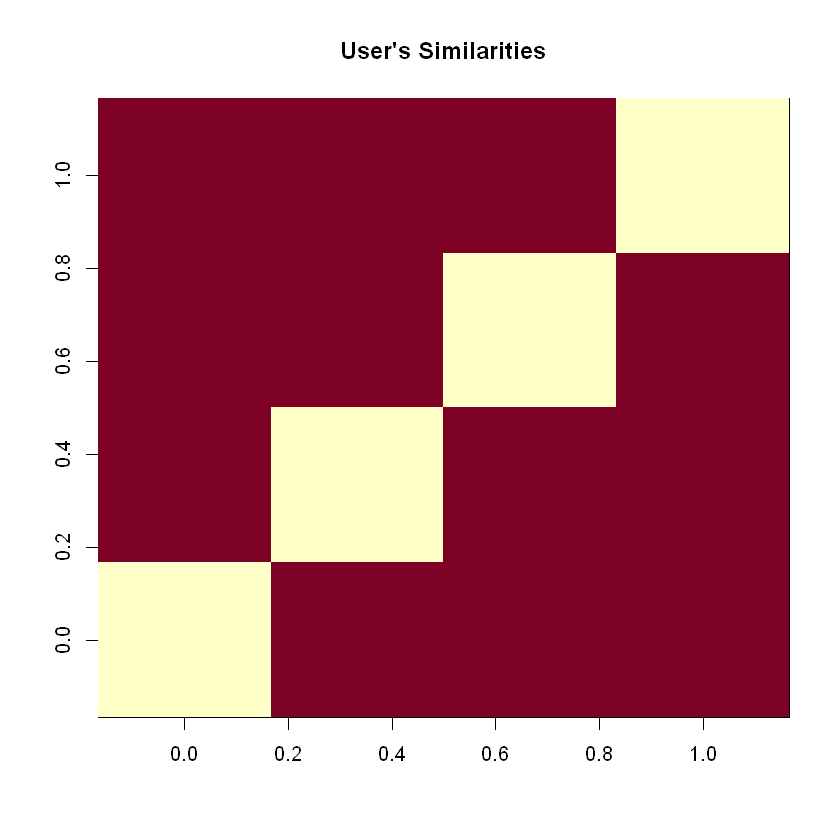

In [33]:
similarity_mat <- similarity(ratingMatrix[1:4, ],method ="cosine",which = "users")
as.matrix(similarity_mat)
image(as.matrix(similarity_mat),main ="User's Similarities")

In [34]:
rating_values <-as.vector(ratingMatrix@data)
unique(rating_values)

[1] 0.0 5.0 4.0 3.0 4.5 1.5 2.0 3.5 1.0 2.5 0.5

In [38]:
Table_of_Ratings<-table(rating_values)
Table_of_Ratings

rating_values
      0     0.5       1     1.5       2     2.5       3     3.5       4     4.5 
6791761    1198    3258    1567    7943    5484   21729   12237   28880    8187 
      5 
  14856 

In [39]:
library(ggplot2)
movie_views <-colCounts(ratingMatrix)
table_views <- data.frame(movie = names(movie_views),views = movie_views)
table_views <- table_views[order(table_views$views,decreasing=TRUE),]
table_views$title <-NA
for (index in 1:10325)
    {
    table_views[index,3]<-as.character(subset(movie_data,movie_data$movieId == table_views[index,1])$title)
    }
table_views[1:6,]


,movie,views,title
,<chr>,<int>,<chr>
296,296,325,Pulp Fiction (1994)
356,356,311,Forrest Gump (1994)
318,318,308,"Shawshank Redemption, The (1994)"
480,480,294,Jurassic Park (1993)
593,593,290,"Silence of the Lambs, The (1991)"
260,260,273,Star Wars: Episode IV - A New Hope (1977)


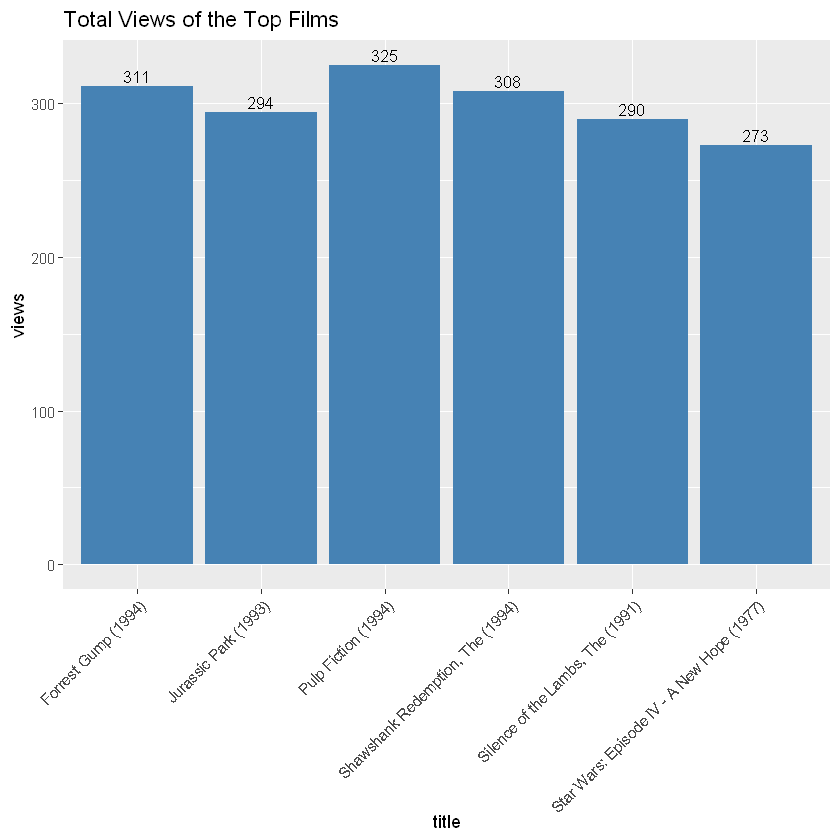

In [50]:
ggplot(table_views[1:6, ], aes(x=title,y=views))+
geom_bar(stat="identity",fill = 'steelblue')+
geom_text(aes(label=views),vjust=-0.3,size=3.5)+
theme(axis.text.x=element_text(angle=45,hjust=1))+
ggtitle("Total Views of the Top Films")

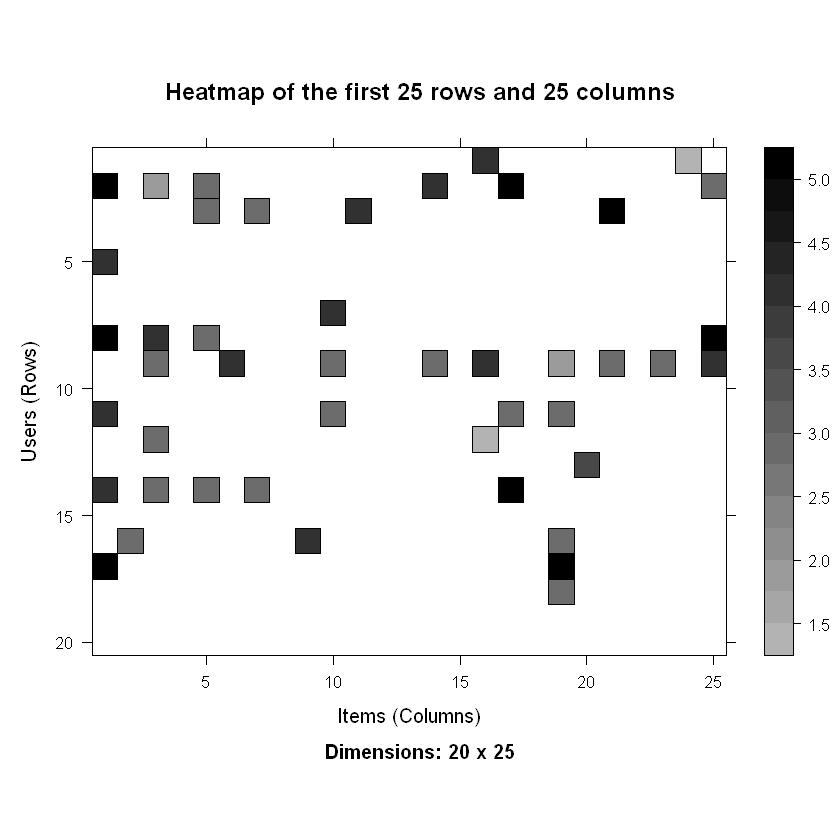

In [51]:
image(ratingMatrix[1:20,1:25],axes=FALSE,main= "Heatmap of the first 25 rows and 25 columns")
     

In [59]:
movie_rating <- ratingMatrix[rowCounts(ratingMatrix) >50,colCounts(ratingMatrix)>50]
movie_rating

420 x 447 rating matrix of class 'realRatingMatrix' with 38341 ratings.

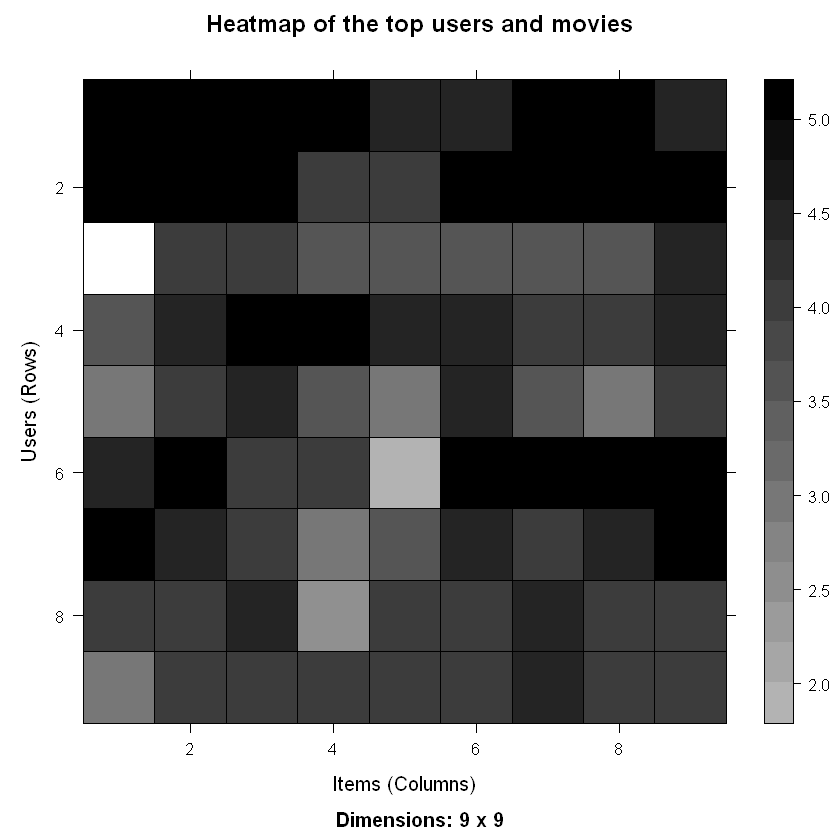

In [60]:
minimum_movies<- quantile(rowCounts(movie_rating),0.98)
minimum_users<- quantile(colCounts(movie_rating),0.98)
image(movie_rating[rowCounts(movie_rating) > minimum_movies,colCounts(movie_rating) > minimum_users],
     main="Heatmap of the top users and movies")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



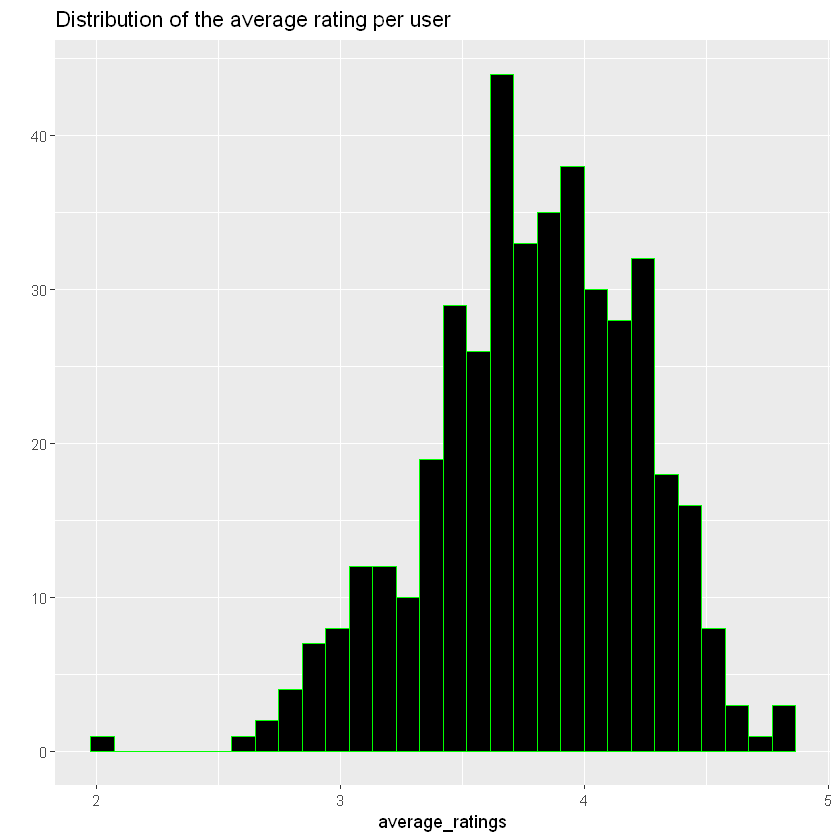

In [66]:
average_ratings <- rowMeans(movie_rating)
qplot(average_ratings, fill = I("black"),col=I("green"))+
ggtitle("Distribution of the average rating per user")

[1] 0

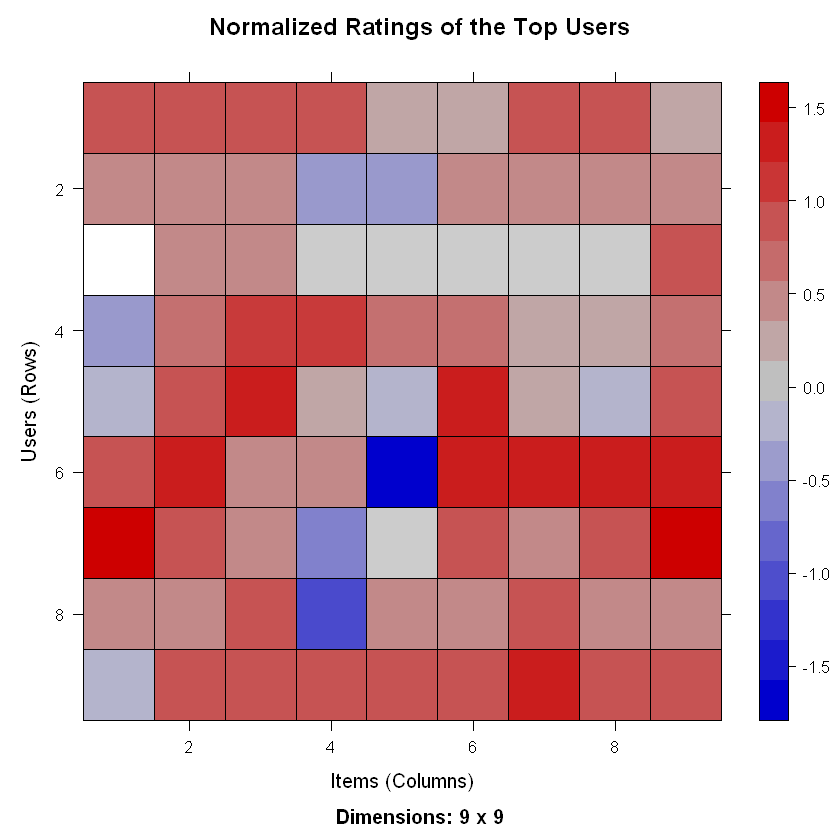

In [67]:
normalized_ratings <- normalize(movie_rating)
sum(rowMeans(normalized_ratings)>0.00001)
image(normalized_ratings[rowCounts(normalized_ratings)>minimum_movies,colCounts(normalized_ratings)>minimum_users],
     main = "Normalized Ratings of the Top Users")


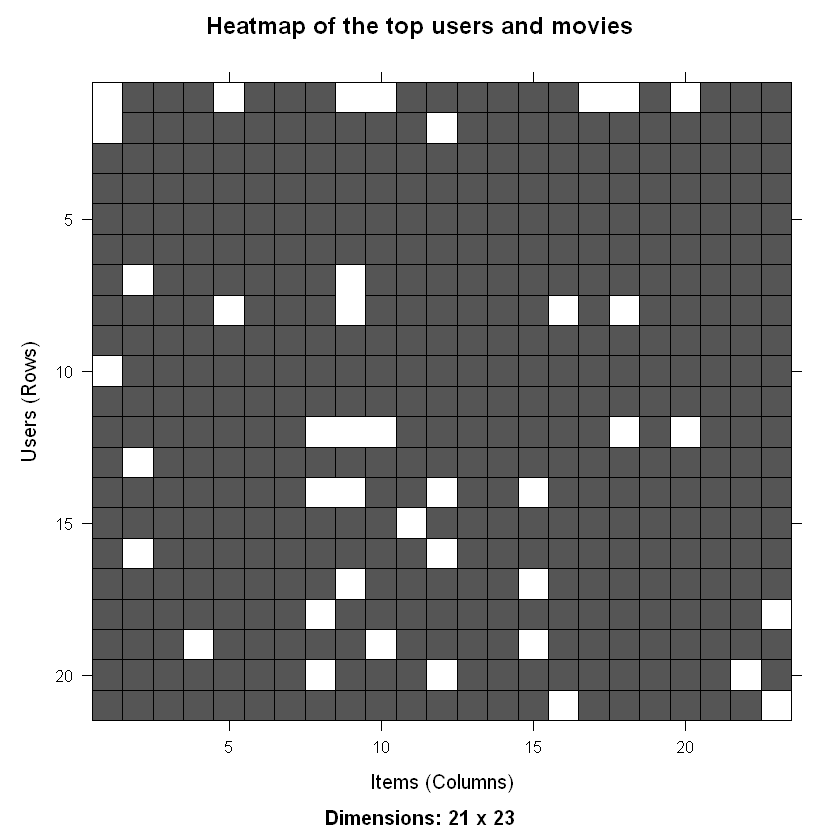

In [73]:
binary_minimum_movies <- quantile(rowCounts(movie_rating),0.95)
binary_minimum_users<- quantile(colCounts(movie_rating),0.95)
movies_watched <-binarize(movie_rating,minRating =1)

good_rated_films <- binarize(movie_rating,minRating=3)
image(good_rated_films[rowCounts(movie_rating)> binary_minimum_movies,colCounts(movie_rating)>binary_minimum_users],
     main="Heatmap of the top users and movies")

In [75]:
sampled_data<-sample(x= c(TRUE,FALSE),size = nrow(movie_rating),replace =TRUE,prob= c(0.8,0.2))
training_data <- movie_rating[sampled_data, ]
testing_data <-movie_rating[!sampled_data, ]

In [76]:
recommendation_system<- recommenderRegistry$get_entries(dataType ="realRatingMatrix")
recommendation_system$IBCF_realRatingMatrix$parameters

$k
[1] 30

$method
[1] "Cosine"

$normalize
[1] "center"

$normalize_sim_matrix
[1] FALSE

$alpha
[1] 0.5

$na_as_zero
[1] FALSE

In [79]:
recommen_model <-Recommender(data = training_data,method="IBCF",parameter = list(k=30))
recommen_model
class (recommen_model)

Recommender of type 'IBCF' for 'realRatingMatrix' 
learned using 348 users.

[1] "Recommender"
attr(,"package")
[1] "recommenderlab"

In [80]:
class (recommen_model)

[1] "Recommender"
attr(,"package")
[1] "recommenderlab"

[1] "dgCMatrix"
attr(,"package")
[1] "Matrix"

[1] 447 447

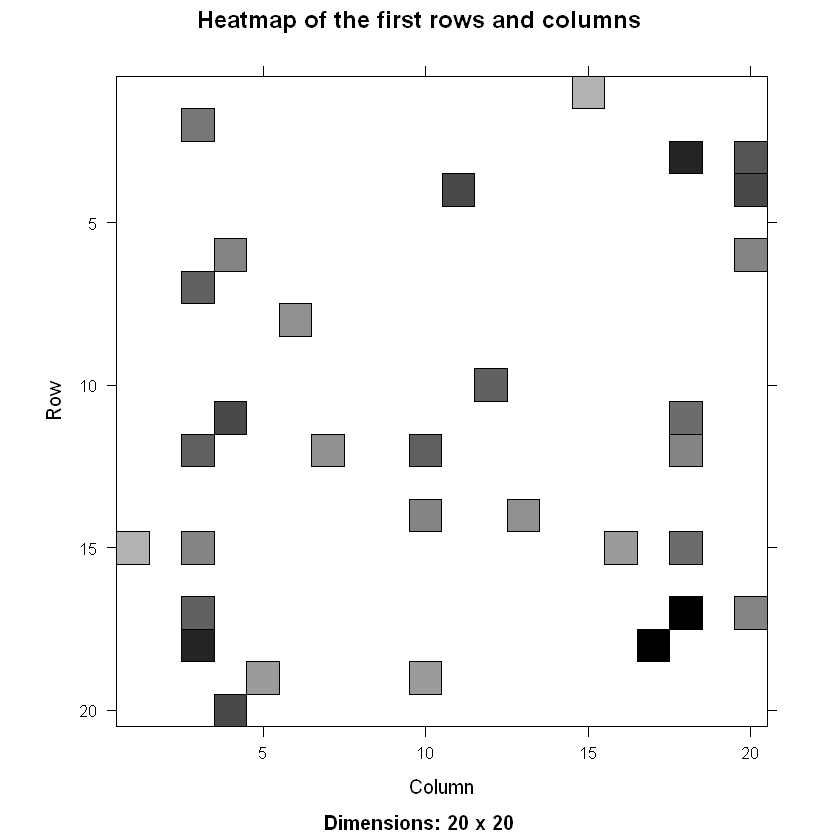

In [81]:
model_info <- getModel(recommen_model)
class(model_info$sim)
dim(model_info$sim)
top_items<-20
image(model_info$sim[1:top_items, 1:top_items], 
      main="Heatmap of the first rows and columns")

In [83]:
sum_rows <-rowSums(model_info$sim >0)
table(sum_rows)

sum_rows
 30 
447 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



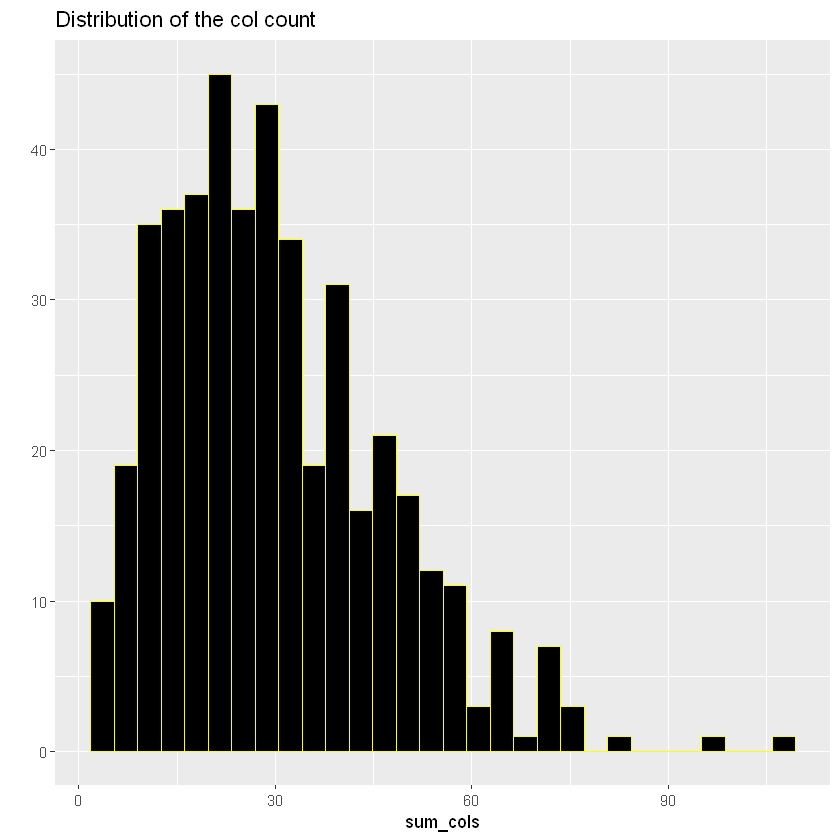

In [89]:
sum_cols <-colSums(model_info$sim >0)
qplot(sum_cols,fill=I("black"),col=I(" yellow "))+ggtitle("Distribution of the col count")

In [90]:
top_recommendations <-10
predicted_recommendations<-predict(object = recommen_model,newdata=testing_data,n=top_recommendations)
predicted_recommendations

Recommendations as 'topNList' with n = 10 for 72 users. 

In [94]:
user1 <-predicted_recommendations@items[[1]]
movies_user1 <- predicted_recommendations@itemLabels[user1]
movies_user2 <-movies_user1
for ( index in 1:10)
    {
        movies_user2[index] <- as.character(subset(movie_data,movie_data$movieId ==movies_user1[index])$title)
    }
movies_user2

[1] "Toy Story (1995)"             "Casino (1995)"               
 [3] "Sense and Sensibility (1995)" "Get Shorty (1995)"           
 [5] "Leaving Las Vegas (1995)"     "Babe (1995)"                 
 [7] "Dead Man Walking (1995)"      "Mr. Holland's Opus (1995)"   
 [9] "Braveheart (1995)"            "Taxi Driver (1976)"

In [106]:
recommendation_matrix <- sapply(predicted_recommendations@items,function(x)
                                {as.integer(colnames(movie_rating)[x])})
recommendation_matrix[,1:4]

1,32,785,1961
16,145,1275,2571
17,168,3481,1625
21,260,1035,8665
25,261,4720,4993
34,293,1641,1682
36,520,1527,1234
62,852,3418,17
110,858,4963,25
111,1047,3175,265


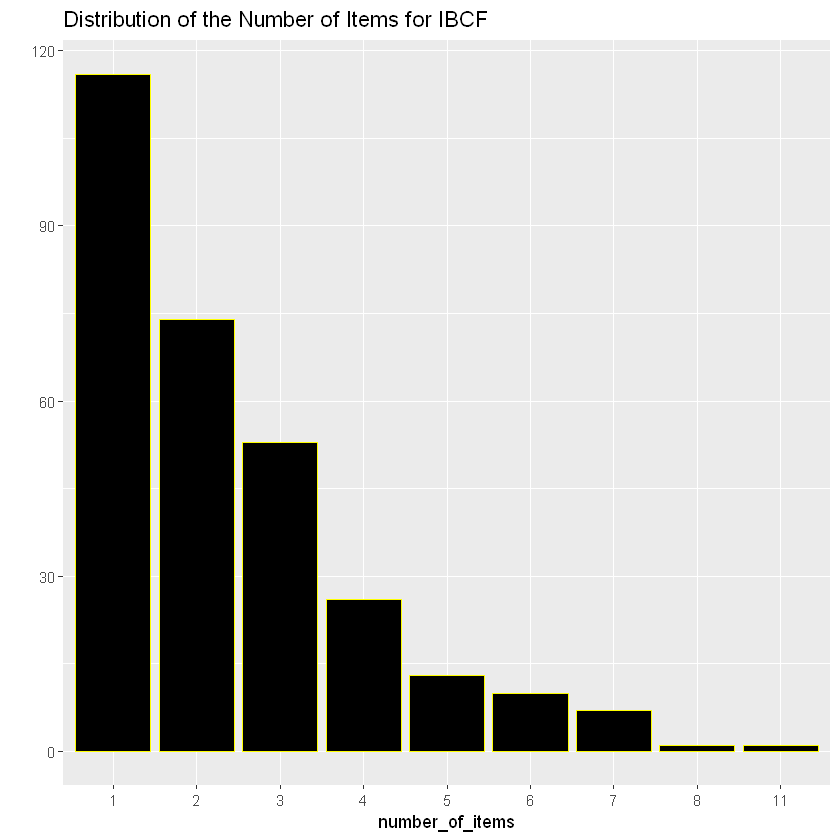

In [108]:
number_of_items<-factor(table(recommendation_matrix))
qplot(number_of_items,fill=I("black"),col=I("yellow"))+ggtitle("Distribution of the Number of Items for IBCF")

In [109]:
number_of_items_sorted <-sort(number_of_items,decreasing =TRUE)
number_of_items_top <-head(number_of_items_sorted,n=4)
table_top<-data.frame(as.integer(names(number_of_items_top)),number_of_items_top)
for(i in 1:4)
    {
        table_top[i,1]<-as.character(subset(movie_data,movie_data$movieId==table_top[i,1])$title)       
    }
colnames(table_top)<-c("Movie Title","No.of Items")
head(table_top)

,Movie Title,No.of Items
,<chr>,<fct>
25,Leaving Las Vegas (1995),11
745,Wallace & Gromit: A Close Shave (1995),8
1,Toy Story (1995),7
6,Heat (1995),7
